In [11]:
function mod_new(n,N)
    if n == 0
        return 1
    elseif n%N == 0
        return n
    else
        return n%N
    end
end

mod_new (generic function with 1 method)

In [12]:
function energy(M)
    J = -1.0
    N = size(M)[1]

    E = 0

    for i=1:N
        for j=1:N
            s = M[i,j]
            E += -M[i,j]*(M[mod_new(i+1,N),j] + M[i,mod_new(j+1,N)] + M[mod_new(i-1,N),j] + M[i,mod_new(j-1,N)]) #neighbour(M,(i,j))
        end
    end

    return -J*(E)/2
end


energy (generic function with 1 method)

In [13]:
function neighbour(M,(a,b))
    N = size(M)[1]
    return M[mod_new(a+1,N),b] + M[a,mod_new(b+1,N)] + M[mod_new(a-1,N),b] + M[a,mod_new(b-1,N)]
end

neighbour (generic function with 1 method)

In [3]:
#print(size( rand((-1,1),(100,100))))

In [22]:
function magnetization(M)
    m = 0
    len_lat = size(M)[1]
    for i=1:len_lat
        for j=1:len_lat
            m+=M[i,j]
        end
    end
    return m
end


magnetization (generic function with 1 method)

In [16]:
function minimum_ele(M)
    if M[1] > M[2]
        return M[2]
    else
        return M[1]
    end        
end

function monte(M, Temperature)
    N = size(M)[1]
    
    time_steps = 10^3
    
    for i = 1:time_steps
            a = rand((1:N)) #random number
            b = rand((1:N)) #random number
            
            spin = M[a,b]
            
            dE = 2*spin*neighbour(M,(a,b))
            
            tent = minimum_ele([1.0, exp(-dE/Temperature)])
            prob = rand() # rand no between 0 1 uniformly distributed
            
            if tent > prob
                spin = -1*spin
            else
                spin = spin
            #M[a] = spin
            end
            M[a,b] = spin
            #println(M)
    end
    return M
end


monte (generic function with 1 method)

In [17]:
function main(temp_array)
    Pts = 35 #no. of points on Energy-Temp graph

    Erg_array = zeros(Pts,1) #LinRange(0.001,5,Pts)
    Mag_array = zeros(Pts,1) #LinRange(0.001,5,Pts)

    for i=1:Pts
        print(i, " ")
        N = 9 #??
        len_lat = 100
        Lat = rand((-1,1),(len_lat,len_lat))
        magn_cal = 0
        erg_cal = 0
        fc = 2^N
        for j=1:2^N
            Lat = monte(Lat,temp_array[i])
            magn_cal+=magnetization(Lat)/fc
            erg_cal+=energy(Lat)/fc
        end
        Mag_array[i] = magn_cal/(len_lat^2)
        Erg_array[i] = erg_cal/(len_lat^2)
    end
    return Mag_array, Erg_array
end

main (generic function with 1 method)

In [7]:
using PyPlot
#Ts = range(0.1, 1.5, length=100)
#exact_C(T) = 1/(T * cosh(1/T))^2
exact_C(T) = -2tanh(2/T)


exact_C (generic function with 1 method)

In [18]:
Pts = 35 #no. of points on Energy-Temp graph

temp_array = LinRange(0.001,3.5,Pts)


35-element LinRange{Float64}:
 0.001,0.103912,0.206824,0.309735,…,3.08835,3.19126,3.29418,3.39709,3.5

In [23]:
tent_arra = main(temp_array)
M_arra, E_arra = tent_arra[1], tent_arra[2]

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 

([-0.00837421875; -0.043591796875; … ; 0.014169921875; -0.022646875], [-1.69040859375; -1.689602734375; … ; -0.6838923828125; -0.659705859375])

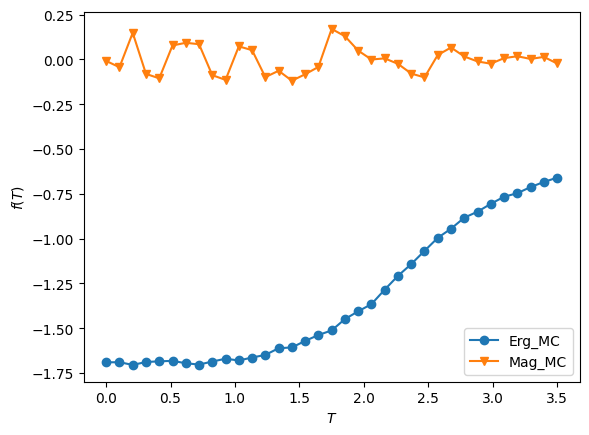

PyObject <matplotlib.legend.Legend object at 0x7f68e4ded460>

In [24]:
Ts = temp_array
#plt.plot(Ts, exact_C.(Ts), label="Exact")
plt.plot(temp_array, E_arra, label="Erg_MC", marker="o")
plt.plot(temp_array, M_arra, label="Mag_MC", marker="v")

plt.xlabel(raw"$T$")
plt.ylabel(raw"$f(T)$")
#plt.xlim([0, nothing])
#plt.ylim([0, nothing])
plt.legend()
